1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
(1, 784)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
(1, 784)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
(1, 784)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
(1, 784)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
(1, 784)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
(1, 784)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
(1, 784)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
(1, 784)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
(1, 784)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
(1, 784)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
(1, 784)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
(1, 784)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
(1, 784)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
(1, 784)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
(1, 784)


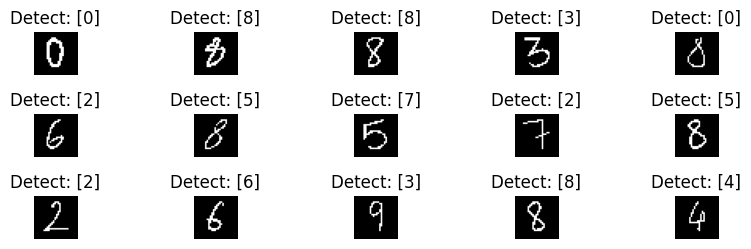

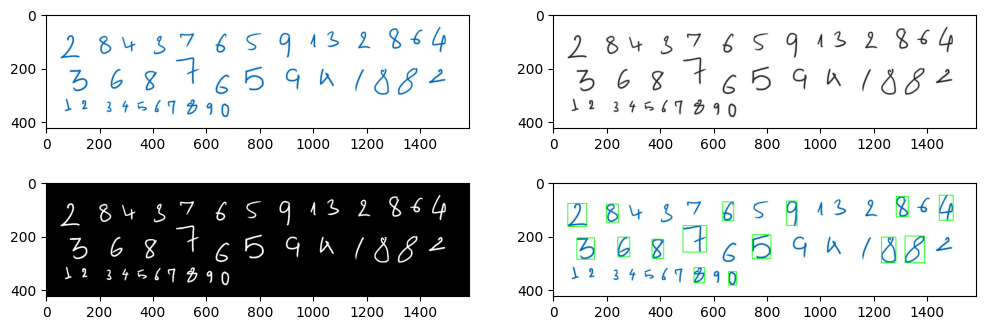

In [110]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
model = load_model('../model/model.h5')
# img = cv2.imread('number1.png')
img = cv2.imread('number2.jpg')

# img = cv2.imread('test.jpg')

img_cnt = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
binary_img = cv2.threshold(gray, 0, 1, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
contours, _ = cv2.findContours(binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
plt.figure(figsize=(10, 8))
plt.subplots_adjust(hspace=0.9)
i = 1
avg_area = np.mean([cv2.contourArea(contour) for contour in contours])
for contour in contours:
    if cv2.contourArea(contour) < avg_area -15:
        continue
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(img_cnt, (x, y), (x+w, y+h), (0, 255, 0), 2)
    img_roi = binary_img[y:y+h, x:x+w]
    plt.subplot(8, int(len(contours)/8)+1, i)
    
    h, w = img_roi.shape[:2]
    scale = min(28 / w, 28 / h)
    new_w = int(w * scale*0.7)
    new_h = int(h * scale*0.7)
    img_resized = cv2.resize(img_roi, (new_w, new_h))
    x_offset = (28 - new_w) // 2
    y_offset = (28 - new_h) // 2
    res = np.zeros((28, 28), dtype=np.uint8)
    res[y_offset:y_offset + new_h, x_offset:x_offset + new_w] = img_resized
    x = res.flatten().reshape(1, -1)  # Đối với đầu vào vector
    num = np.argmax(model.predict(x), axis=-1)
    print(x.shape)
    plt.axis('off')
    plt.imshow(res, cmap='gray')
    plt.title(f'Detect: {num}')
    i += 1
    

plt.figure(figsize=(12, 4))
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(2, 2, 2)
plt.imshow(gray, cmap='gray')
plt.subplot(2, 2, 3)
plt.imshow(binary_img, cmap='gray')
plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(img_cnt, cv2.COLOR_BGR2RGB))